# Importing the dataset and relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from pandas import DataFrame

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load dataset
df = pd.read_csv(r'C:\Users\sidwa\OneDrive\Desktop\Suraj\UCD\CC-copied\Credit_Card_Dataset.csv')

# Exploring the Dataset

In [4]:
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [5]:
# Inspect Data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       690 non-null    object 
 1   B       690 non-null    float64
 2   C       690 non-null    float64
 3   D       690 non-null    object 
 4   E       690 non-null    object 
 5   F       690 non-null    object 
 6   G       690 non-null    object 
 7   H       690 non-null    float64
 8   I       690 non-null    object 
 9   J       690 non-null    object 
 10  K       690 non-null    int64  
 11  L       690 non-null    object 
 12  M       690 non-null    object 
 13  N       690 non-null    float64
 14  O       690 non-null    int64  
 15  P       690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


,B,C,H,K,N,O
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000
mean,31.483058,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.912872,4.978163,3.346513,4.86294,172.159274,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.580000,1.000000,0.165000,0.00000,80.000000,0.000000
50%,28.375000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,37.750000,7.207500,2.625000,3.00000,272.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [6]:
df.tail()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,0.0,0,-


# Inspection and replacing the misssing values in dataset

In [7]:
df = df.replace('?',np.nan)

In [8]:
# for each of the categorical columns, lets see the unique values
for i in df.columns:
    #print(i)
    if df[i].dtype==object:
        print(df[i].unique())

['b' 'a']
['u' 'y' 'l']
['g' 'p' 'gg']
['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j']
['v' 'h' 'bb' 'ff' 'j' 'z' 'o' 'dd' 'n']
['t' 'f']
['t' 'f']
['f' 't']
['g' 's' 'p']
['+' '-']


In [9]:
df = df.replace('?',np.nan)

In [10]:
## Lets modify the functions to make them more readable 

def missing_values(df):
    ''' This function takes a data frame as input 
    prints the fraction of entries with missing values (NaN)
    prints the list of columns with corresponding number of missing values
    '''
    # Total number of entries (rows X columns) in the dataset
    total= df.size
    #Number of missing values per column
    missingCount = df.isnull().sum()
    #Total number of missing values
    missing_tot = missingCount.sum()
    # Calculate percentage of missing values
    #print('general info of dataframe \n\n\n\n',df.info())
    print(f'Total number of missing values for each column of dataframe: \n \b \b \b',missingCount)
    print("The dataset contains", round(((missing_tot/total) * 100), 2), "%", "missing values.\n\n\n")
    
def column_missingdata(df):
    ''' This function takes a data frame as input 
    prints the list of columns with corresponding % of missing values
    '''
    #check for missing values per column
    values=df.isnull().sum()#.sort_values(ascending=False)
    total= df.size
    #percentage of missing values per column
    percentage=(values/total) * 100
    print(f'% of missing values for each column of dataframe: \n \b \b \b',percentage,'\n\n\n')

def plot_missingdata(df:pd.DataFrame, title:str, xlabel:str, ylabel:str):
    ''' This function takes a data frame as input 
    plots the list of columns with corresponding total number of missing values
    '''
    # Let us see what columns have missing values
    # total number of missing values for each dataframe column
    missing = df.isnull().sum() 
    # keeping only the columns with missing values>0 
    missing = missing[missing > 0] 
    # sorting in order of missing values and making the change to original missing series
    missing.sort_values(inplace=True) 
    missing.plot.bar(color='blue')
    plt.title(title, size=15)
    plt.xticks(fontsize=11,rotation=45)
    plt.yticks(fontsize=11)
    plt.xlabel(xlabel, fontsize=13)
    plt.ylabel(ylabel, fontsize=13)
    plt.show()

In [11]:
def fix_missing_mean(df,col):
    ''' This function takes a data frame as input 
    replaces the missing values of a particular column with it's mean value
    '''
    #replace missing values with mean 
    df[col] = pd.to_numeric(df[col], errors = 'coerce')
    df[col].fillna(df[col].mean(), inplace = True)    

def fix_missing_mode(df,col):
    ''' This function takes a data frame as input 
    replaces the missing values of a particular column with it's mean value
    '''
    #replace missing values with mode 
    #df[col] = pd.to_numeric(df[col], errors = 'coerce')
    df[col].fillna(df[col].mode(), inplace = True)    

    
def fix_missing_ffill(df, col):
    ''' This function takes a data frame as input 
    replaces the missing values of a particular column with the value from the previous row
    '''
    #df[col] = pd.to_numeric(df[col], errors = 'coerce')
    df[col] = df[col].fillna(method='ffill')  
    
def fix_missing_bfill(df, col):
    ''' This function takes a data frame as input 
    replaces the missing values of a particular column with the value from the next row
    '''
    #df[col] = pd.to_numeric(df[col], errors = 'coerce')
    df[col] = df[col].fillna(method='bfill')

In [12]:
fix_missing_ffill(df,'A')
fix_missing_ffill(df,'B')
fix_missing_ffill(df,'D')
fix_missing_ffill(df,'E')
fix_missing_ffill(df,'F')
fix_missing_ffill(df,'G')
fix_missing_mean(df,'N')
missing_values(df)

Total number of missing values for each column of dataframe: 
    A    0
B    0
C    0
D    0
E    0
F    0
G    0
H    0
I    0
J    0
K    0
L    0
M    0
N    0
O    0
P    0
dtype: int64
The dataset contains 0.0 % missing values.





# Exploratory Data Analysis (EDA)

In [13]:
# Separate target from features
y = df['P']
features = df.drop(['P'], axis=1)
# Preview features
features.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0


In [14]:
# List of categorical columns
object_cols = ['A','B','D','E','F','G','I','J','L','M','N']
 
# ordinal-encode categorical columns
X = features.copy()
ordinal_encoder = OrdinalEncoder()
X[object_cols] = ordinal_encoder.fit_transform(features[object_cols])
# Preview the ordinal-encoded features
X.head() 


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,1.0,156.0,0.000,1.0,0.0,12.0,7.0,1.25,1.0,1.0,1,0.0,0.0,69.0,0
1,0.0,328.0,4.460,1.0,0.0,10.0,3.0,3.04,1.0,1.0,6,0.0,0.0,11.0,560
2,0.0,89.0,0.500,1.0,0.0,10.0,3.0,1.50,1.0,0.0,0,0.0,0.0,97.0,824
3,1.0,125.0,1.540,1.0,0.0,12.0,7.0,3.75,1.0,1.0,5,1.0,0.0,31.0,3
4,1.0,43.0,5.625,1.0,0.0,12.0,7.0,1.71,1.0,0.0,0,0.0,2.0,37.0,0


<AxesSubplot:>

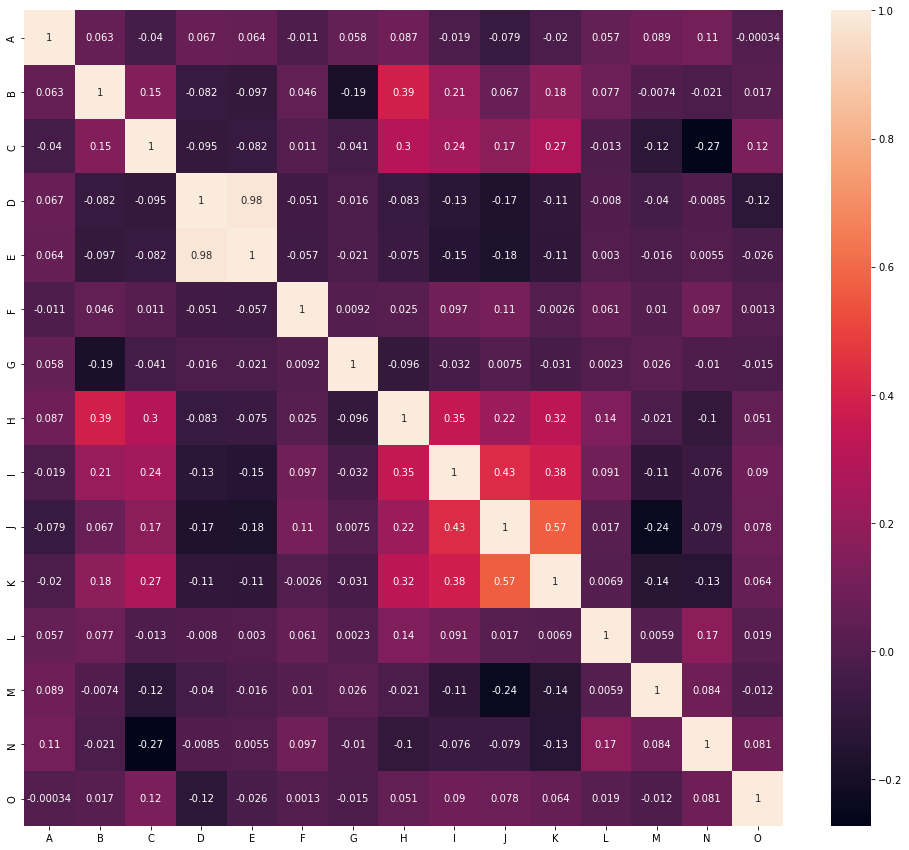

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(17,15))
sns.heatmap(X.corr(), annot = True) 

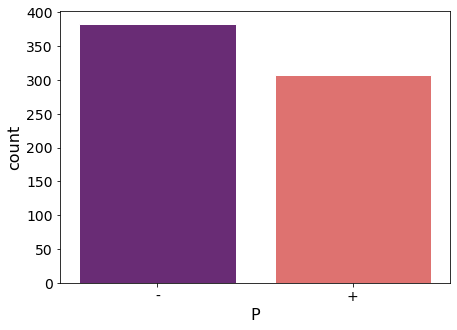

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(7,5), sharex=True)
sns.countplot(data=df, x='P',edgecolor="white",palette="magma",order=df["P"].value_counts().index)
total = df['P'].value_counts().sum()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('P', fontsize=16)
plt.ylabel('count', fontsize=16)

plt.show()

# Splitting the data into testing and training dataset

In [17]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y,
                                               test_size=0.30,
                                               random_state=2)

# Machine Learning Classifiers
# 1. Logistic Regression

In [18]:
# Logistic Regression

# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledxTrain = scaler.fit_transform(xTrain)
rescaledxTest = scaler.fit_transform(xTest)

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression 
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledxTrain, yTrain)

LogisticRegression()

In [19]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix
# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledxTest)
y_pred1 = logreg.predict(rescaledxTrain)

# Get the accuracy score of logreg model and print it
print("Test: Accuracy = ", logreg.score(rescaledxTest,yTest))
print("Train: Accuracy = ", logreg.score(rescaledxTrain,yTrain))

# Print the confusion matrix of the logreg model
confusion_matrix(yTest,y_pred)

Test: Accuracy =  0.8792270531400966
Train: Accuracy =  0.855072463768116


array([[91, 11],
       [14, 91]], dtype=int64)

# 2. Decision Tree

1 Train score: 0.8426501035196687 Test score: 0.8840579710144928
2 Train score: 0.8426501035196687 Test score: 0.8840579710144928
3 Train score: 0.8509316770186336 Test score: 0.855072463768116
4 Train score: 0.8737060041407867 Test score: 0.8357487922705314
5 Train score: 0.8881987577639752 Test score: 0.8405797101449275
6 Train score: 0.9254658385093167 Test score: 0.8115942028985508
7 Train score: 0.94824016563147 Test score: 0.821256038647343
8 Train score: 0.9668737060041408 Test score: 0.8115942028985508
9 Train score: 0.9813664596273292 Test score: 0.8309178743961353


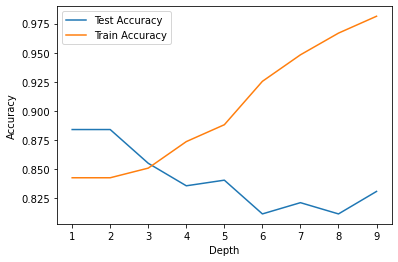

In [20]:
# Decision Tree
train_acc=[]
test_acc=[]
list_score=[]
p=[]

for i in range(1, 10):
    
    dtc = DecisionTreeClassifier(max_depth = i ,random_state = 0)
    dtc.fit(xTrain, yTrain)

    train_pred = dtc.predict(xTrain)
    #train_acc.append(score(train_pred, yTrain))
    
    test_pred = dtc.predict(xTest)
    #test_acc.append(score(test_pred, yTest))
    test_acc = accuracy_score(yTest, test_pred)
    train_acc = accuracy_score(yTrain, train_pred)
    print(i,'Train score:',train_acc,'Test score:',test_acc)

    list_score.append([i,accuracy_score(train_pred, yTrain),accuracy_score(test_pred, yTest)]) 
    
    
df2 = DataFrame (list_score,columns=['Depth','Train Accuracy','Test Accuracy'])
plt.plot(df2['Depth'],df2['Test Accuracy'],label='Test Accuracy')
plt.plot(df2['Depth'],df2['Train Accuracy'],label='Train Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()

# 3. Gradient Boosting

Train score: 0.9813664596273292 Test score: 0.8695652173913043


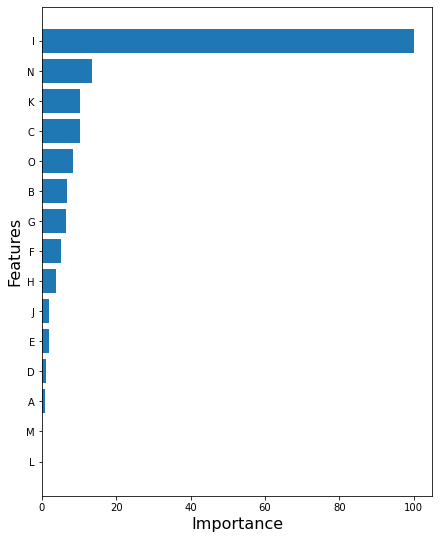

In [21]:
# Gradient Boost
clf = GradientBoostingClassifier(random_state=0)
clf.fit(xTrain, yTrain)

train_predict = clf.predict(xTrain)
test_predict = clf.predict(xTest)


test_acc = accuracy_score(yTest, test_predict)
train_acc = accuracy_score(yTrain, train_predict)
print('Train score:',train_acc,'Test score:',test_acc)



# Plot feature importance 
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(7, 9))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.keys()[sorted_idx])
plt.xlabel('Importance',fontsize=16)
plt.ylabel('Features',fontsize=16)
plt.show()

# 4. XGBoost

In [24]:
# fit model to training data
model = XGBClassifier()
model.fit(xTrain, yTrain)

train_predict = model.predict(xTrain)
test_predict = model.predict(xTest)

test_acc = accuracy_score(yTest, test_predict)
train_acc = accuracy_score(yTrain, train_predict)
print('Train score:',train_acc,'Test score:',test_acc)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['+' '-']

# 5. kNN

Train score: 0.8115942028985508 Test score: 0.6714975845410628
2 Train score: 0.8115942028985508 Test score: 0.6714975845410628
Train score: 0.7929606625258799 Test score: 0.6811594202898551
3 Train score: 0.7929606625258799 Test score: 0.6811594202898551
Train score: 0.7619047619047619 Test score: 0.6521739130434783
4 Train score: 0.7619047619047619 Test score: 0.6521739130434783
Train score: 0.7743271221532091 Test score: 0.6908212560386473
5 Train score: 0.7743271221532091 Test score: 0.6908212560386473
Train score: 0.7660455486542443 Test score: 0.6763285024154589
6 Train score: 0.7660455486542443 Test score: 0.6763285024154589
Train score: 0.7370600414078675 Test score: 0.6956521739130435
7 Train score: 0.7370600414078675 Test score: 0.6956521739130435
Train score: 0.7391304347826086 Test score: 0.7101449275362319
8 Train score: 0.7391304347826086 Test score: 0.7101449275362319
Train score: 0.7308488612836439 Test score: 0.7101449275362319
9 Train score: 0.7308488612836439 Test sc

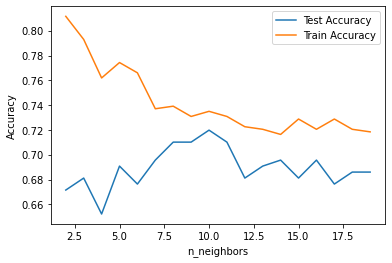

In [23]:
# kNN
from sklearn.neighbors import KNeighborsClassifier

train_acc=[]
test_acc=[]
list_score=[]

for i in range(2, 20):
    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(xTrain,yTrain)

    train_predict = knn.predict(xTrain)
    test_predict = knn.predict(xTest)

    test_acc = accuracy_score(yTest, test_predict)
    train_acc = accuracy_score(yTrain, train_predict)
    print('Train score:',train_acc,'Test score:',test_acc)
    print(i,'Train score:',train_acc,'Test score:',test_acc)

    list_score.append([i,accuracy_score(train_predict, yTrain),accuracy_score(test_predict, yTest)]) 
    
    
df3 = DataFrame (list_score,columns=['n_neighbors','Train Accuracy','Test Accuracy'])
plt.plot(df3['n_neighbors'],df3['Test Accuracy'],label='Test Accuracy')
plt.plot(df3['n_neighbors'],df3['Train Accuracy'],label='Train Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()